### Script to plot the vertical profiles of the maximum and mean PV budget residuals from the native mesh files ###

#### *Fig 8 in JAMES paper*
---

Manda Chasteen<br>
April 2024

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

import warnings
warnings.simplefilter("ignore") 

In [4]:
# Global mean cell height (AGL) -- precomputed: 

hgt_mean = np.array([23.46662 , 76.577835, 142.2688 , 220.98576 , 313.19623 , 419.373 , 539.91125 , 675.28613 , 825.9186 , 992.19366 , 
            1174.7301 , 1373.7909 , 1589.8113 , 1823.2872 , 2074.7295 , 2344.283 , 2632.389 , 2939.8752 , 3266.5732 , 
            3613.3872 , 3980.574 , 4368.4404 , 4777.5244 , 5208.391 , 5660.9995 , 6136.505 , 6634.999 , 7157.0967 , 
            7703.0933 , 8273.639 , 8869.326 , 9491.046 , 10139.161 , 10814.469 , 11517.821 , 12248.614 , 13009.587 , 
            13799.668 , 14619.748 , 15471.564 , 16354.052 , 17263.8 , 18186.29 , 19110.822 , 20036.516 , 20962.666 , 
            21889.504 , 22815.92 , 23743.23 , 24668.701 , 25595.904 , 26523.398 , 27450.395 , 28378.082 , 29305.627 ])

In [5]:
# Import native output files:

parent_single = ''     # single precision simulations directory name 
parent_double = ''     # double precision simulations directory name 

file_s = xr.open_dataset(parent_single+'/pvbudget15to3.2019-05-20_03.00.36.nc', chunks={'nCells' : 5000}).squeeze()
file_d = xr.open_dataset(parent_double+'/pvbudget15to3d.2019-05-20_03.00.36.nc', chunks={'nCells' : 5000}).squeeze()

dt = file_s.attrs['config_dt']

*Single precision:*

In [6]:
# Read in fields and calculate instantaneous PV budget in units of PVU

pv1_s = file_s.ertel_pv_prev                 # PV at beginning of time step
pv2_s = file_s.ertel_pv                      # PV at end of time step (i.e., time file is output)

tend_dyn_s = file_s.depv_dt_dyn              # dynamics PV tendency over previous time step in PVU/s
tend_diab_s = file_s.depv_dt_diab            # diabatic PV tendency over previous time step in PVU/s
tend_fric_s = file_s.depv_dt_fric            # frictional PV tendency over previous time step in PVU/s

# Calculate budget terms:
tend_total_s = (tend_dyn_s + tend_diab_s + tend_fric_s) * dt
pv2_calc_s = pv1_s + tend_total_s
pv_resid_s = pv2_s - pv2_calc_s

In [9]:
pv_resid_abs_s = np.abs(pv_resid_s)
pv_resid_max_s = pv_resid_abs_s.max(dim='nCells').values
pv_resid_mean_s = pv_resid_abs_s.mean(dim='nCells').values

*Double precision:*

In [10]:
# Read in fields and calculate instantaneous PV budget in units of PVU

pv1_d = file_d.ertel_pv_prev                 # PV at beginning of time step
pv2_d = file_d.ertel_pv                      # PV at end of time step (i.e., time file is output)

tend_dyn_d = file_d.depv_dt_dyn              # dynamics PV tendency over previous time step in PVU/s
tend_diab_d = file_d.depv_dt_diab            # diabatic PV tendency over previous time step in PVU/s
tend_fric_d = file_d.depv_dt_fric            # frictional PV tendency over previous time step in PVU/s

# Calculate budget terms:
tend_total_d = (tend_dyn_d + tend_diab_d + tend_fric_d) * dt
pv2_calc_d = pv1_d + tend_total_d
pv_resid_d = pv2_d - pv2_calc_d

In [11]:
pv_resid_abs_d = np.abs(pv_resid_d)
pv_resid_max_d = pv_resid_abs_d.max(dim='nCells').values
pv_resid_mean_d = pv_resid_abs_d.mean(dim='nCells').values

In [20]:
# Print the max and mean absolute values of the PV budget residuals as a function of height 

print(r'Maximum absolute PV budget residual - single: ')
print(pv_resid_max_s)
print(r'Mean absolute PV budget residual - single: ')
print(pv_resid_mean_s)
print('--')
print(r'Maximum absolute PV budget residual - double: ')
print(pv_resid_max_d)
print(r'Mean absolute PV budget residual - double: ')
print(pv_resid_mean_d)
print('--')
print(r'Overall maximum absolute PV budget residual - single: ')
print(np.max(pv_resid_max_s))
print(r'Overall maximum absolute PV budget residual - double: ')
print(np.max(pv_resid_max_d))

Maximum absolute PV budget residual - single: 
[0.00535202 0.00281715 0.00322247 0.00246477 0.00195694 0.00188065
 0.00172627 0.00164795 0.00170326 0.00116467 0.00128603 0.00104046
 0.00086975 0.00111008 0.00074196 0.00100136 0.00064182 0.0007782
 0.00073624 0.00067906 0.00061274 0.00064933 0.00086784 0.00079536
 0.00068796 0.00078416 0.00091243 0.00079656 0.00079083 0.00087976
 0.00091624 0.00090981 0.00070286 0.00075352 0.00115013 0.00116444
 0.00140953 0.00134277 0.00149536 0.00222778 0.00234985 0.00195312
 0.00240707 0.00231934 0.0022583  0.00231934 0.00223541 0.00209808
 0.00196838 0.00190544 0.00305176 0.00439453 0.00561523 0.00683594
 0.01953125]
Mean absolute PV budget residual - single: 
[0.0000891  0.00005372 0.00003204 0.00002793 0.00002434 0.00002229
 0.00002047 0.00001883 0.0000175  0.00001636 0.00001552 0.00001466
 0.00001387 0.00001328 0.0000128  0.00001248 0.00001219 0.00001219
 0.00001209 0.0000119  0.00001175 0.00001184 0.0000122  0.00001285
 0.00001379 0.0000148  0.0

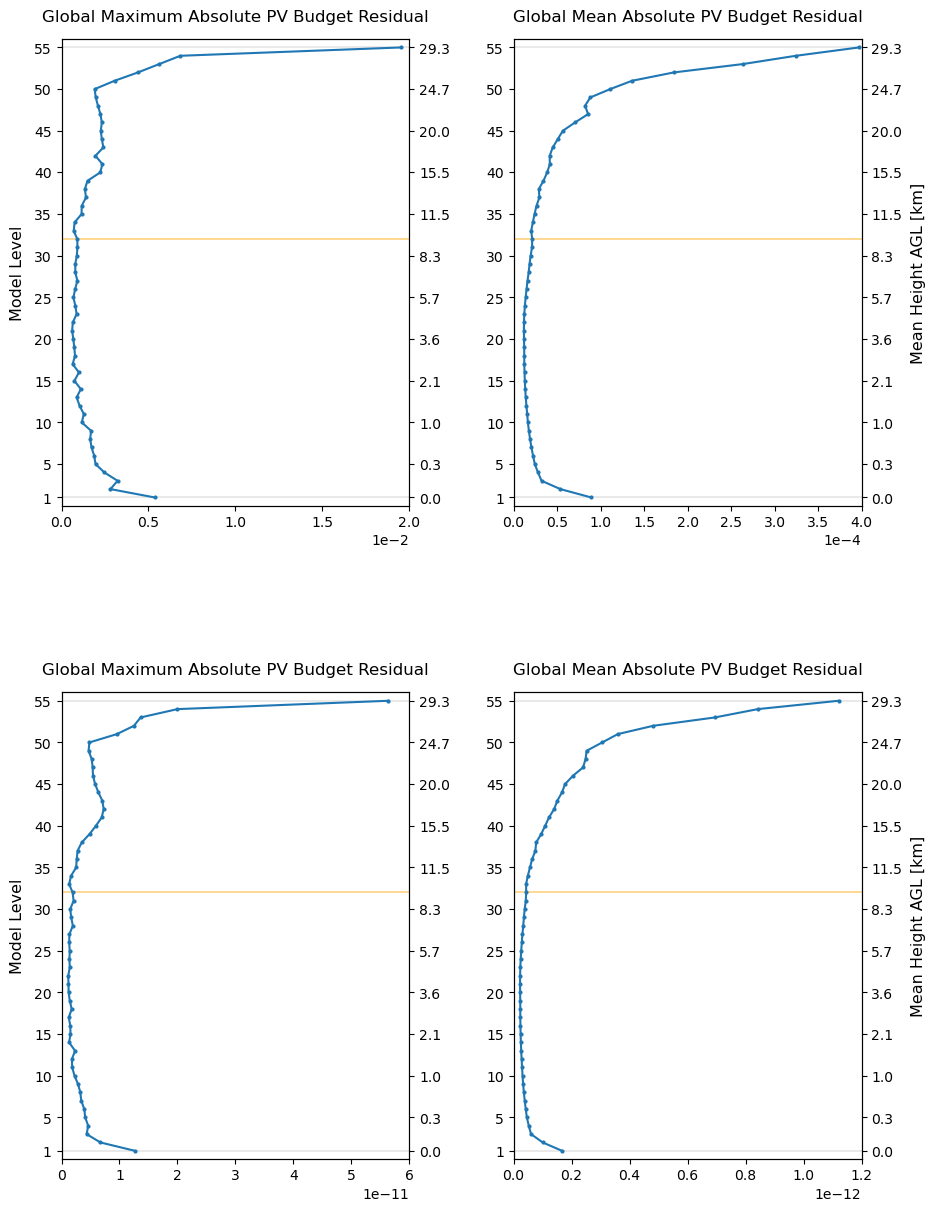

In [26]:
# Makes 4 panel plot of residual profiles:

levels = np.arange(1,56,1)
hgt_km = hgt_mean / 1000

plt.rcParams['savefig.dpi'] = 350
fig, axs = plt.subplots(2,2,figsize=(10,14)) 
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
ax = axs.flatten()

#######
# Set up common plot attributes:
for i in np.arange(0,np.shape(ax)[0],1):
    
    # x tick formats:
    ax[i].ticklabel_format(axis='x', style='scientific', scilimits=(-1,1))
    
    # Axis limits and y ticks:
    ax[i].set_ylim([0,56])
    ytix = np.hstack((1, np.arange(5,60,5)))
    ax[i].set_yticks(ytix)
    
    # Rasterization order:
    ax[i].set_rasterization_zorder(1)

    # Add horizontal lines:
    ax[i].hlines(1, 0, 0.02, zorder=1.2, linewidth=0.25, color='gray')
    ax[i].hlines(55, 0, 0.02, zorder=1.2, linewidth=0.25, color='gray')
    ax[i].hlines(32, 0, 0.02, zorder=1.5, linewidth=1.2, color='orange', alpha=0.5)

    # Add y axis for mean height AGL
    axa = ax[i].twinx()
    axa.set_ylim(ax[i].get_ylim())
    axa.set_yticks(np.arange(5,60,5))
    axa.set_yticks(np.hstack((1,np.arange(5,60,5))))
    labels = [np.round(hgt_km[lev-1],1) for lev in axa.get_yticks()]
    axa.set_yticklabels(labels)

    if (i % 2) == 0:
        ax[i].set_ylabel('Model Level', fontsize=11.5, labelpad=6.5)
    else:
        axa.set_ylabel('Mean Height AGL [km]', fontsize=11.5, labelpad=6.5)



# Single precision -- max absolute PV budget residual
ax[0].plot(pv_resid_max_s,levels, zorder=2)
ax[0].scatter(pv_resid_max_s,levels, s=4, zorder=3)

ax[0].set_xlim([0, 0.020])
ax[0].set_xticks(np.arange(0, 0.025, 0.005))
ax[0].set_title(r'Global Maximum Absolute PV Budget Residual',fontsize=12,y=1.02,fontweight='medium', loc='center', horizontalalignment='center')


# Single precision -- mean absolute PV budget residual
ax[1].plot(pv_resid_mean_s,levels, zorder=2)
ax[1].scatter(pv_resid_mean_s,levels, s=4, zorder=3)

ax[1].set_xlim([0, 0.0004])
ax[1].set_title(r'Global Mean Absolute PV Budget Residual',fontsize=12,y=1.02,fontweight='medium', loc='center', horizontalalignment='center')


# Double precision -- max absolute PV budget residual
ax[2].plot(pv_resid_max_d,levels, zorder=2)
ax[2].scatter(pv_resid_max_d,levels, s=4, zorder=3)

ax[2].set_xlim([0, 6e-11])
ax[2].set_title(r'Global Maximum Absolute PV Budget Residual',fontsize=12,y=1.02,fontweight='medium', loc='center', horizontalalignment='center')


# Double precision -- mean absolute PV budget residual
ax[3].plot(pv_resid_mean_d,levels, zorder=2)
ax[3].scatter(pv_resid_mean_d,levels, s=4, zorder=3)

ax[3].set_xlim([0, 1.2e-12])
ax[3].set_title(r'Global Mean Absolute PV Budget Residual',fontsize=12,y=1.02,fontweight='medium', loc='center', horizontalalignment='center')

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.3, hspace=0.4)


figname = 'mpas_global_residual_profiles_03.00.18Z.pdf'
#fig.savefig(figname,bbox_inches="tight")

plt.show()